In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read the csv file into a pandas DataFrame
houseTrain = pd.read_csv('../data/train.csv')
houseTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Read the csv file into a pandas DataFrame
#houseTest = pd.read_csv('../data/test.csv')
#houseTest.head()

In [4]:
#houseTest = test.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

In [5]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values = 'NaN', strategy= 'mean', axis =0)
#imputer = imputer.fit(houseTest)
#houseTest = imputer.transform(houseTest)

In [6]:
#houseTest.shape

In [7]:
train = houseTrain
train.shape

(1460, 81)

In [8]:
train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,346.992466,1.565068,6.517808,1971.267808,1984.865753,1978.506164
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,436.528436,0.550916,1.625393,30.202904,20.645407,24.689725
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,1872.000000,1950.000000,1900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,0.000000,1.000000,5.000000,1954.000000,1967.000000,1961.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,0.000000,2.000000,6.000000,1973.000000,1994.000000,1980.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,728.000000,2.000000,7.000000,2000.000000,2004.000000,2002.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,2065.000000,3.000000,14.000000,2010.000000,2010.000000,2010.000000


In [9]:
X = train.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]
y = train['SalePrice'].values.reshape(-1,1)
print(X.shape, y.shape)

(1460, 12) (1460, 1)


In [10]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy= 'mean', axis =0)
imputer = imputer.fit(X)
X = imputer.transform(X)
X.shape

(1460, 12)

In [11]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\husra\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\husra\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\husra\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components= None)
pca = PCA(n_components= 6)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.fit_transform(X_test_scaled)


explained_variance = pca.explained_variance_ratio_

In [15]:
explained_variance

array([0.49836555, 0.15258738, 0.11984026, 0.07315055, 0.04076645,
       0.03157601])

In [16]:
#test = explained_variance[0] + explained_variance[1]
#test

In [17]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

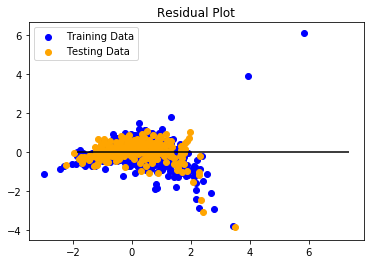

Weight coefficients:  [[ 0.35667968  0.03218175  0.05721023 -0.02406516  0.23810274 -0.16373685]]
y-axis intercept:  [6.702411e-17]


In [18]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

In [19]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23044435612042663, R2: 0.8002757261102879


In [20]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23542426444782064, R2: 0.7959596795319706


In [21]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2304447914750198, R2: 0.800275348791956


In [22]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)
predictions_inverse = y_scaler.inverse_transform(elasticnet.predict(X_test_scaled))

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23303751515817903, R2: 0.7980282559851137


In [23]:
print(f"First 10 Predictions:   {predictions_inverse[3]}")
print(f"First 10 Actual labels: {y_test[3]}")

First 10 Predictions:   164747.95716473638
First 10 Actual labels: [159000]


In [24]:
# so they are in the format: array()
price = []
for x in range(0, len(predictions_inverse)):
    x_predict = np.array(predictions_inverse[x])
    price.append(x_predict)
#print(f"Predict X Value: {price}")

In [25]:
old_price = []
for x in range(0, len(y_test)):
    y = np.array(y_test[x])
    old_price.append(y)

In [26]:
#x_predict = np.array([[predictions_inverse[3]]])
#x_predict

In [27]:
sd = pd.Series(price)

# Reorganize DataFrame
new_predict = pd.DataFrame(sd, columns=[
                        "Predict Price"])
new_predict.dtypes

Predict Price    object
dtype: object

In [28]:
sg = pd.Series(old_price)
# Reorganize DataFrame
price = pd.DataFrame(sg, columns=[
                        "Price"])
price.dtypes


Price    object
dtype: object

In [29]:
predict = new_predict['Predict Price'].astype(int)
predict.head()

0    159628
1    305849
2    113344
3    164747
4    291439
Name: Predict Price, dtype: int32

In [30]:
max(predict)

450026

In [31]:
original_price = price['Price'].astype(int)
original_price.head()

0    154500
1    325000
2    115000
3    159000
4    315500
Name: Price, dtype: int32

In [59]:
final = pd.DataFrame({"Prediction": predict, "Actual": original_price})
final.head()

,Prediction,Actual
0,159628,154500
1,305849,325000
2,113344,115000
3,164747,159000
4,291439,315500


In [33]:
#from sklearn.externals import joblib
#joblib.dump(elasticnet, 'house_price_model.ml')

In [34]:
#new_set = y_scaler.inverse_transform(elasticnet.predict(houseTest))

In [35]:
# Read the csv file into a pandas DataFrame
houseTest = pd.read_csv('../data/test.csv')
houseTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
predictor_cols = ['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
test_X = houseTest[predictor_cols]

In [37]:
#test_X.head()

In [38]:
# Drop all rows with missing information
#df = test_X.dropna(how='any')
#df.shape

In [39]:
#df_1 = df.drop(['Id'], axis=1)
#df_1.head()

In [40]:
#predicted_prices = y_scaler.inverse_transform(elasticnet.predict(df_1))

In [41]:
#print(predicted_prices)

In [42]:
#my_submission = pd.DataFrame({'Id': df.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
#my_submission.to_csv('submission.csv', index=False)

In [43]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy= 'mean', axis =0)
imputer = imputer.fit(test_X)
test_X = imputer.transform(test_X)

In [44]:
e_dataframe = pd.DataFrame(test_X, columns=['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'])     

In [45]:
e_dataframe.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
0,1461.0,5.0,896.0,1.0,730.0,882.0,896.0
1,1462.0,6.0,1329.0,1.0,312.0,1329.0,1329.0
2,1463.0,5.0,1629.0,2.0,482.0,928.0,928.0
3,1464.0,6.0,1604.0,2.0,470.0,926.0,926.0
4,1465.0,8.0,1280.0,2.0,506.0,1280.0,1280.0


In [46]:
df_1 = e_dataframe.drop(['Id'], axis=1)
df_1.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
0,5.0,896.0,1.0,730.0,882.0,896.0
1,6.0,1329.0,1.0,312.0,1329.0,1329.0
2,5.0,1629.0,2.0,482.0,928.0,928.0
3,6.0,1604.0,2.0,470.0,926.0,926.0
4,8.0,1280.0,2.0,506.0,1280.0,1280.0


In [47]:
#predicted_prices = y_scaler.inverse_transform(elasticnet.predict(df_1))

In [48]:
#predicted_prices

In [49]:
#e_dataframe_2 = pd.DataFrame(predicted_prices, columns=['Id'])

In [50]:
#e_dataframe_2

In [51]:
t_scaler = StandardScaler().fit(df_1)
t_scaled = t_scaler.transform(df_1)

In [52]:
predicted_prices = y_scaler.inverse_transform(elasticnet.predict(t_scaled))

In [53]:
predicted_prices

array([153386.50458324, 182527.03882935, 164787.9482348 , ...,
       165336.25268589, 152099.5154417 , 210150.97060914])

In [54]:
e_dataframe_2 = pd.DataFrame(predicted_prices, columns=['Predicted'])

In [55]:
e_dataframe_2.head()

,Predicted
0,153386.504583
1,182527.038829
2,164787.948235
3,184009.553498
4,224494.526638


In [56]:
my_submission = pd.DataFrame({'Id': e_dataframe.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [57]:
max(predicted_prices)

322317.485445541